## Loading and working with the data

In [1]:
from keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = train_images.reshape(60000, 28*28)
x_test = test_images.reshape(10000, 28*28)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train /= np.max(x_train)
x_test /= np.max(x_test)

## Change to one-hot shape

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Building the model

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,610 (1.69 MB)

 Trainable params: 443,610 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

## Starting to train the model

In [11]:
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

model.compile(optimizer=SGD(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])

In [12]:
History = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1274 - loss: 2.2887 - val_accuracy: 0.4007 - val_loss: 2.0873
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3375 - loss: 2.0711 - val_accuracy: 0.6416 - val_loss: 1.8495
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5222 - loss: 1.8464 - val_accuracy: 0.7059 - val_loss: 1.5983
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6047 - loss: 1.6244 - val_accuracy: 0.7492 - val_loss: 1.3619
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6521 - loss: 1.4151 - val_accuracy: 0.7820 - val_loss: 1.1600
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6883 - loss: 1.2475 - val_accuracy: 0.8086 - val_loss: 1.0000
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7181 - loss: 1.1044 - val_accuracy: 0.8255 - val_loss: 0.8767
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7325 - loss: 1.0075 - val_accuracy: 0.

## Plotting the result

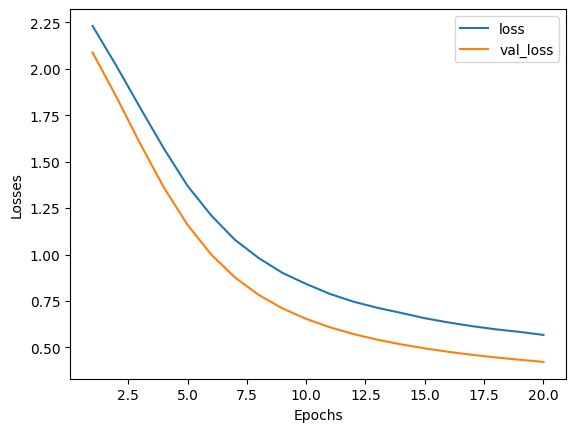

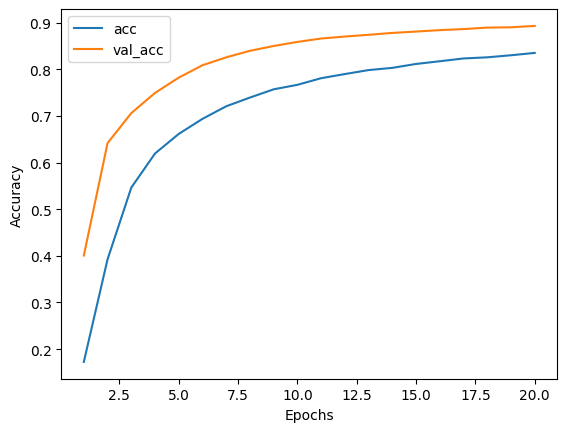

In [13]:
import matplotlib.pyplot as plt

loss = History.history['loss']
acc = History.history['accuracy']
val_loss = History.history['val_loss']
val_acc = History.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'])
plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'])

## Final evaluation

In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.4884


[0.4288540482521057, 0.8895999789237976]